In [2]:
import daft

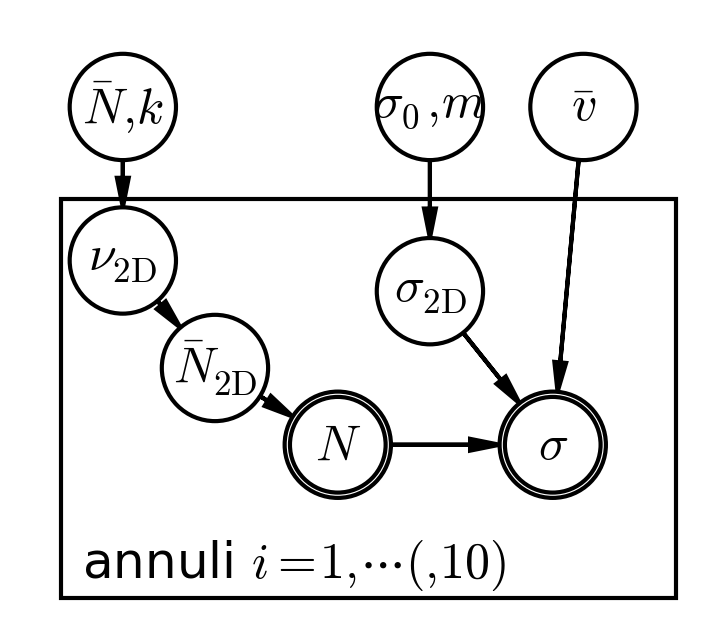

In [26]:
# Instantiate a PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], grid_unit=2.6, node_unit=0.9, observed_style="inner")

# Hierarchical parameters.
#pgm.add_node(daft.Node("mu", r"$\mu$", 0.5, 2, fixed=True))
#pgm.add_node(daft.Node("S", r"$S$", 1.5, 2, fixed=True))

# Latent variable:
pgm.add_node(daft.Node("nu", r"$\bar{N},k$", 0.7, 2))
pgm.add_node(daft.Node("sig", r"$\sigma_0,m$", 1.7, 2))
pgm.add_node(daft.Node("vbar", r"$\bar{v}$", 2.2, 2))

# Data:
pgm.add_node(daft.Node("nu2d", r"$\nu_{\rm 2D}$", 0.7, 1.5))
pgm.add_node(daft.Node("N2d", r"$\bar{N}_{\rm 2D}$", 1., 1.15))

pgm.add_node(daft.Node("N", r"$N$", 1.4, 0.9,observed=True))

pgm.add_node(daft.Node("sig2D", r"$\sigma_{\rm 2D}$", 1.7, 1.4))

pgm.add_node(daft.Node("sigobs", r"$\sigma$", 2.1, 0.9,observed=True))

# Add in the edges.
pgm.add_edge("nu","nu2d")
pgm.add_edge("nu2d","N2d")
pgm.add_edge("N2d","N")
pgm.add_edge("sig","sig2D")
pgm.add_edge("sig2D","sigobs")
pgm.add_edge("vbar","sigobs")
pgm.add_edge("N","sigobs")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1.2], label=r"annuli $i = 1, \cdots(,10)$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig("annularPGM.png", dpi=300)

# Display:
from IPython.display import Image
Image(filename="annularPGM.png")

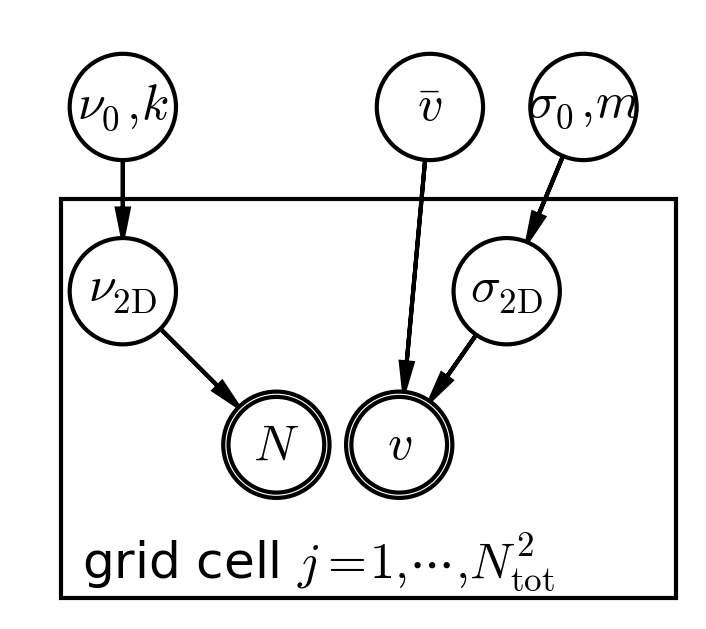

In [31]:
# Instantiate a PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], grid_unit=2.6, node_unit=0.9, observed_style="inner")

# Hierarchical parameters.
#pgm.add_node(daft.Node("mu", r"$\mu$", 0.5, 2, fixed=True))
#pgm.add_node(daft.Node("S", r"$S$", 1.5, 2, fixed=True))

# Latent variable:
pgm.add_node(daft.Node("nu", r"$\nu_0,k$", 0.7, 2))
pgm.add_node(daft.Node("sig", r"$\sigma_0,m$", 2.2, 2))
pgm.add_node(daft.Node("vbar", r"$\bar{v}$", 1.7, 2))

# Data:
pgm.add_node(daft.Node("nu2d", r"$\nu_{\rm 2D}$", 0.7, 1.4))

pgm.add_node(daft.Node("N", r"$N$", 1.2, 0.9,observed=True))
pgm.add_node(daft.Node("vobs", r"$v$", 1.6, 0.9,observed=True))


pgm.add_node(daft.Node("sig2D", r"$\sigma_{\rm 2D}$", 1.95, 1.4))

# Add in the edges.
pgm.add_edge("nu","nu2d")
pgm.add_edge("nu2d","N")
pgm.add_edge("sig","sig2D")
pgm.add_edge("vbar","vobs")
pgm.add_edge("sig2D","vobs")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1.2], label=r"grid cell $j = 1, \cdots, N_{\rm tot}^2$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig("gridPGM.png", dpi=300)

# Display:
from IPython.display import Image
Image(filename="gridPGM.png")